In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Linear Regression Easy Version

In [27]:
X, y = make_regression(n_samples=100, n_features=1, noise=10, random_state=0)

In [28]:
model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [29]:
y_pred = model.predict(X)

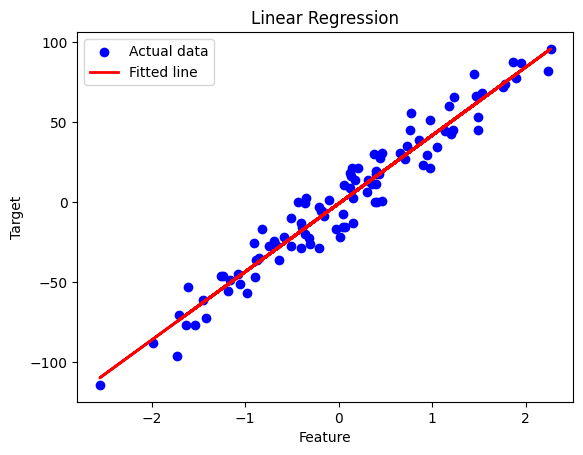

Coefficients: [42.61943029]
Intercept: -0.8141818270307248
Mean Squared Error: 114.1714861681948


In [30]:
plt.scatter(X, y, color='blue', label='Actual data')
plt.plot(X, y_pred, color='red', linewidth=2, label='Fitted line')
plt.xlabel('Feature')
plt.ylabel('Target')
plt.title('Linear Regression')
plt.legend()
plt.show()

print(f"Coefficients: {model.coef_}")
print(f"Intercept: {model.intercept_}")
print(f"Mean Squared Error: {mean_squared_error(y, y_pred)}")

In [31]:
X[:5]

array([[-0.35955316],
       [ 0.97663904],
       [ 0.40234164],
       [-0.81314628],
       [-0.88778575]])

In [32]:
y_pred[:5]

array([-16.13813273,  40.80961751,  16.3333897 , -35.47001311,
       -38.65110461])

In [33]:
np.random.seed(42)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)

print("Mean Squared Error:", mse)

print("Intercept:", model.intercept_)
print("Coefficient:", model.coef_)

Mean Squared Error: 0.6536995137170025
Intercept: [4.14291332]
Coefficient: [[2.79932366]]


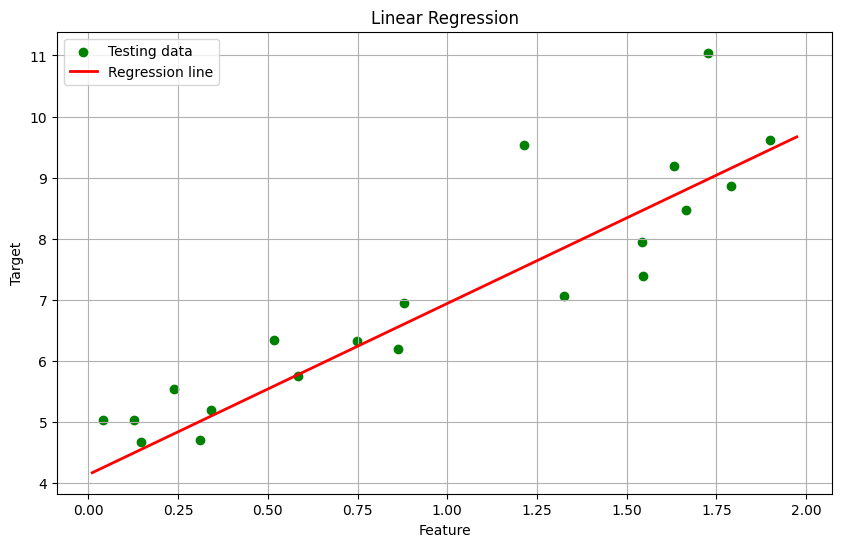

In [34]:
plt.figure(figsize=(10, 6))

# plt.scatter(X_train, y_train, color='blue', label='Training data')

plt.scatter(X_test, y_test, color='green', label='Testing data')

X_range = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
y_range = model.predict(X_range)
plt.plot(X_range, y_range, color='red', linewidth=2, label='Regression line')

plt.xlabel('Feature')
plt.ylabel('Target')
plt.title('Linear Regression')
plt.legend()
plt.grid(True)
plt.show()

# Ordinary Least Squares

$$
\text{RSS} = \sum_{i=1}^{n} (y_i - \hat{y}_i)^2 = \sum_{i=1}^{n} (y_i - (\beta_0 + \beta_1 X_i))^2
$$


$$
\begin{pmatrix}
\beta_0 \\
\beta_1
\end{pmatrix}
=
(X^T X)^{-1} X^T y
$$


X is the design matrix that includes a column of ones for the intercept and the values of the independent variable.

In [35]:
X[:3]

array([[0.74908024],
       [1.90142861],
       [1.46398788]])

In [36]:
X[:5]

array([[0.74908024],
       [1.90142861],
       [1.46398788],
       [1.19731697],
       [0.31203728]])

In [37]:
concatenated_matr = np.hstack((np.ones((X.shape[0], 1)), X))
concatenated_matr[:5]

array([[1.        , 0.74908024],
       [1.        , 1.90142861],
       [1.        , 1.46398788],
       [1.        , 1.19731697],
       [1.        , 0.31203728]])

In [61]:
temp_x = np.array([[4], [5], [6]])
temp_y = np.array([[1], [2], [3]])

In [62]:
stacked_temp_x = np.hstack((np.ones((temp_x.shape[0], 1)), temp_x))

$$
X^T X = 
\begin{pmatrix}
\sum_{i=1}^{n} 1 & \sum_{i=1}^{n} X_i \\
\sum_{i=1}^{n} X_i & \sum_{i=1}^{n} X_i^2
\end{pmatrix}
=
\begin{pmatrix}
n & \sum_{i=1}^{n} X_i \\
\sum_{i=1}^{n} X_i & \sum_{i=1}^{n} X_i^2
\end{pmatrix}
$$


In [65]:
stacked_temp_x.transpose() @ stacked_temp_x

array([[ 3., 15.],
       [15., 77.]])

What does this matrix tell me?

index 0,0: Provides the scale, indicating how many data points we have.

index 0, 1/1, 0: Gives the overall magnitude of the independent variable. This term helps in computing the covariance between the independent variable and the dependent variable.

index 1,1: Represents the distribution and variance of the independent variable. It's a key term in understanding how the independent variable changes.

In [67]:
temp_x.shape

(3, 1)

In [68]:
temp_x

array([[4],
       [5],
       [6]])

$$X^T X$$

is a matrix that combines the information from the independent variable and its interaction with itself.


$$ X^Ty $$

captures the relationship between the independent variable and the observed values (its covariance)

$$
X^T y = 
\begin{pmatrix}
\sum_{i=1}^{n} y_i \\
\sum_{i=1}^{n} X_i y_i
\end{pmatrix}
$$



Index 0,0 : This provides information on the overall level of the dependent variable.

Index 0,1: This term is crucial as it encapsulates how each independent variable is related to its corresponding observed value.

$$ (X^T X)^{-1} $$

is the inverse of the matrix. Normalizes the data.

In [73]:
np.linalg.inv(concatenated_matr.transpose()@concatenated_matr)

array([[ 0.03523199, -0.02683222],
       [-0.02683222,  0.02853394]])

### Exercise

Implement the OLS technique

In [114]:
X, y = make_regression(n_samples=100, n_features=1, noise=10, random_state=0)
model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)
mean_squared_error(y_pred, y)

114.1714861681948

In [116]:
print(f"Coefficients: {model.coef_}")
print(f"Intercept: {model.intercept_}")

Coefficients: [42.61943029]
Intercept: -0.8141818270307248


If you use this data, you should be getting pretty much the same results.

$$
\begin{pmatrix}
\beta_0 \\
\beta_1
\end{pmatrix}
=
(X^T X)^{-1} X^T y
$$

Note, X is not the feature matrix only, its a ones by feature matrix.

Also note, the -1 is the inverse of a matrix. How do you do that in Python?

#### Solutions

In [118]:
def ols(X, y):
    
    X = np.hstack([np.ones((X.shape[0], 1)), X])
    X_transpose = X.T
    b, m = (np.linalg.inv(X_transpose @ X)) @ X_transpose @ y
    return (b, m)

In [119]:
X, y = make_regression(n_samples=100, n_features=1, noise=10, random_state=0)
b, m = ols(X,y)
b, m

(-0.8141818270307214, 42.61943029136694)

In [111]:
def predict_(m, x, b):
    return m * x + b

In [120]:
predictions = predict_(m, X, b)

In [125]:
mean_squared_error(predictions, y)

114.17148616819482

# Linear Regression From Scratch

## MSE

In [236]:
def mean_squared_error_1(y_true, y_pred):

    mse = sum((true - pred) ** 2 for true, pred in zip(y_true, y_pred)) / len(y_true)
    return mse

In [245]:
y_true = [3, -0.5, 2, 7]
y_pred = [2.5, 0.0, 2, 8]
mse = mean_squared_error(y_true, y_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 0.375


In [246]:
def mean_squared_error_2(y_true, y_pred):
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)
    mse = np.mean((y_true - y_pred) ** 2)
    return mse

In [247]:
assert mean_squared_error_1(y_true, y_pred) == mean_squared_error_2(y_true, y_pred)

In [248]:
mse = mean_squared_error(y_true, y_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 0.375


## Derivative with respect to m

$$
\frac{\partial \text{MSE}}{\partial m} = \frac{\partial \text{MSE}}{\partial \hat{y}_i} \cdot \frac{\partial \hat{y}_i}{\partial m}
$$

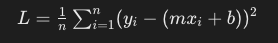

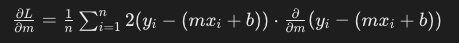

Gradient with respect to m --> 2 * (y - (mx + b)) * x --> -2x * (y - (mx + b))

Gradient with respect to b --> 2 * (y - (mx + b)) * 1 --> -2 * (y - (mx + b))

### Exercise

Take this dataset, and implement a gradient descent linear regression model that best fits a line to that data.

In [73]:
X = 2 * np.random.rand(n_samples, 1)
X2 = 3 * np.random.rand(n_samples, 1)
y = 5 + 4 * X + 2 * X2 + np.random.randn(n_samples, 1) * 0.5

In [74]:
def predict(m, x, b):
    return m * x + b

In [75]:
X[0]

array([1.46398788])

In [76]:
predict(3, 4, 2)

14

### Instructions:

m_gradient = -2/n * np.sum(errors * X)

b_gradient = -2/n * np.sum(errors)

1. Decide on a learning rate and number of iterations.
2. Create a random m and a random b

3. create a training loop, for every iteration, do the following:
4. Calculate one prediction according to the straight line formula (mx + b). *Make sure X is one dimensional, otherwise you will have broadcasting issues which leads to wrong calculations. You might want to use numpy's flatten method.
5. calculate the error, e.g. the gap between the label and the predicted label
6. Calculate a new m in the following form:
    Reduce (lr times m_gradient) from m.
7. Do the same for b (with its respective gradient)

You now hopefully have an efficient m and b

Now generate a prediction, using your m and b.

Write you own mse function and calculate the mean error.

Use this plotting code to see how close are you

Text(0.5, 1.0, 'Linear Regression from Scratch')

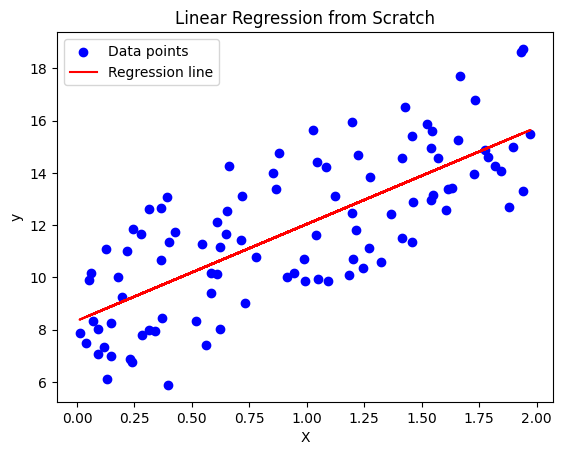

In [78]:
plt.scatter(X, y, color="blue", label="Data points")
plt.plot(X, y_pred, color="red", label="Regression line")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.title("Linear Regression from Scratch")

### Solution

In [99]:
np.random.seed(42)


m = np.random.randn(1)
b = np.random.randn(1)

learning_rate = 0.1
n_iterations = 5
n = len(y_train)

for iteration in range(n_iterations):
    y_pred = m * X_train + b
    errors = y_train - y_pred
    m_gradient = -2/n * np.sum(errors * X_train)
    b_gradient = -2/n * np.sum(errors)
    m = m - learning_rate * m_gradient
    b = b - learning_rate * b_gradient

print("Estimated slope (m):", m)
print("Estimated intercept (b):", b)

Estimated slope (m): [5.56990958]
Estimated intercept (b): [5.36453179]


In [222]:
np.random.seed(42)


m = np.random.randn(1)
b = np.random.randn(1)

learning_rate = 0.01
epochs = 1000
n = len(y)
X = X.flatten()

for epoch in range(epochs):
    y_pred = m * X + b
    errors = y - y_pred
    m_gradient = -2/n * np.sum(errors * X)
    b_gradient = -2/n * np.sum(errors)
    m = m - learning_rate * m_gradient
    b = b - learning_rate * b_gradient

print("Estimated slope (m):", m)
print("Estimated intercept (b):", b)

Estimated slope (m): [42.61943019]
Estimated intercept (b): [-0.81418173]


In [220]:
y_pred = m * X + b

mse = np.mean((y - y_pred) ** 2)

In [221]:
mse

114.1714862071646

In [210]:
x[:5].shape

(5, 1)

In [212]:
x[:5].flatten().shape

(5,)

Mean Squared Error: 114.1714862071646


Text(0.5, 1.0, 'Linear Regression from Scratch')

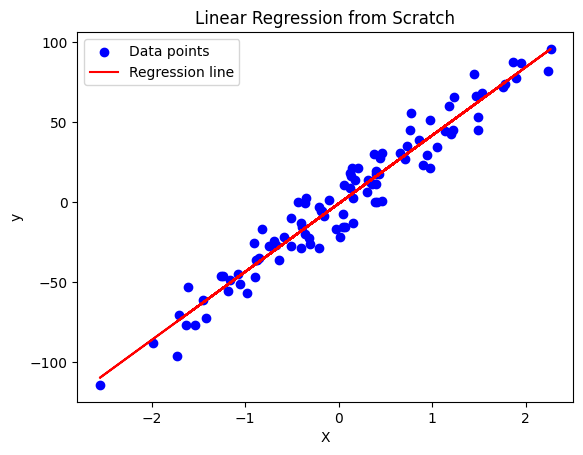

In [225]:
print("Mean Squared Error:", mse)

plt.scatter(x, y, color="blue", label="Data points")
plt.plot(x, y_pred, color="red", label="Regression line")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.title("Linear Regression from Scratch")

# Handling Overfit

## Train/Test Split

Why is it important to split data into train/test?

### Exercise

Build your own version of test_train_split. You get an x and y, you need to return each feature divided into two configurable groups.

Add the possibility to decide what is the size of each group (train/test) and whether the data should be shuffled. Feel free to add anything else you want.

#### solution

In [250]:
def random_data_split(X, y, test_size=0.2, random_state=None):

    if random_state is not None:
        np.random.seed(random_state)

    indices = np.arange(X.shape[0])
    np.random.shuffle(indices)
    
    split_index = int(X.shape[0] * (1 - test_size))
    
    X_train = X[indices[:split_index]]
    X_test = X[indices[split_index:]]
    y_train = y[indices[:split_index]]
    y_test = y[indices[split_index:]]
    
    return X_train, X_test, y_train, y_test

X = np.array([
    [-0.35955316], [0.97663904], [0.40234164], [-0.81314628], [-0.88778575],
    [0.44386323], [-0.97727788], [0.42833187], [0.20827498], [-0.31155253],
    [-0.51080514], [0.12691209], [-1.53624369], [-0.40178094], [0.6536186],
    [1.17877957], [-0.17992484], [1.78587049], [1.45427351], [-0.68481009]
])
y = np.array([
    -1.99558856e+01, 2.13397727e+01, 1.15568946e+01, -1.63420692e+01,
    -3.57006385e+01, 2.79953955e+01, -5.63235304e+01, 1.76104141e+01,
    2.14510620e+01, -2.23528647e+01, -2.74674636e+01, 9.30231368e+00,
    -7.64902562e+01, -2.83346523e+01, 3.06916745e+01, 6.04429895e+01,
    -5.12662959e+00, 7.38599937e+01, 8.02758700e+01, -2.38147640e+01
])


In [261]:
indices = np.arange(X.shape[0])
np.random.shuffle(indices)
indices[:10]

array([ 2,  0,  5, 12, 10, 15, 14,  4, 16,  8])